# Naive Bayes Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Datasets/golf.csv")

In [3]:
data.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [5]:
arr_cols = np.array(data.columns[:-1]).reshape(2,2)
arr_cols

array([['Outlook', 'Temperature'],
       ['Humidity', 'Windy']], dtype=object)

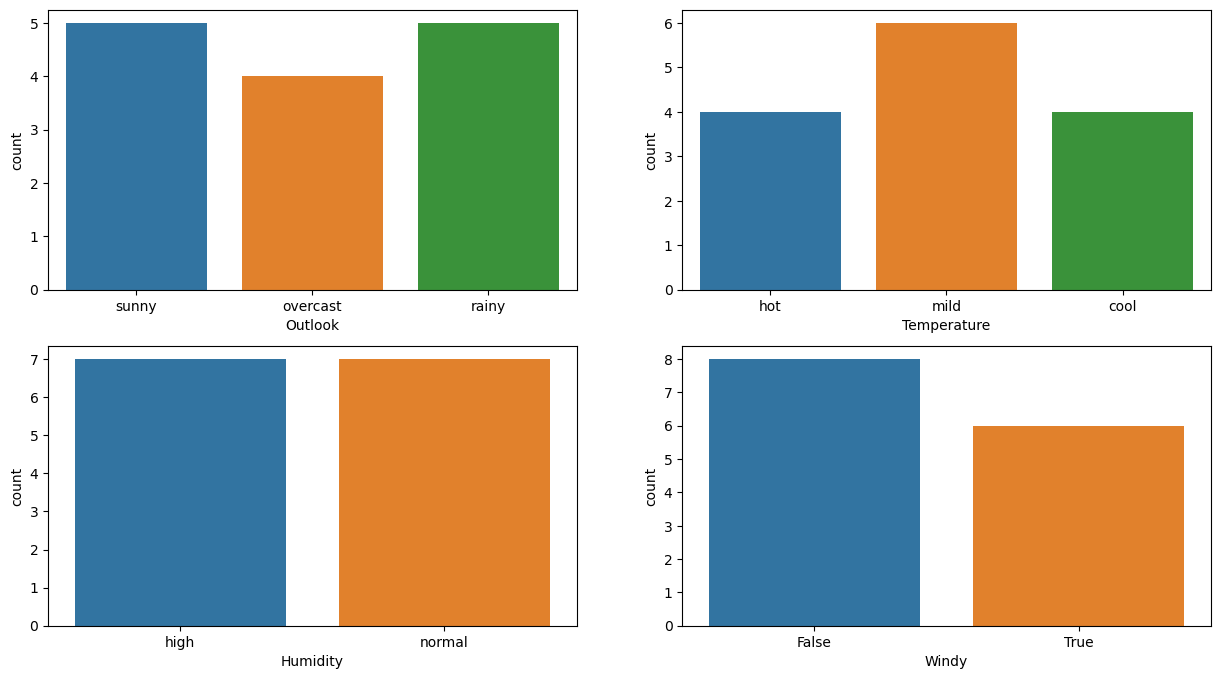

In [6]:
rows, cols = 2,2

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
for i in range(rows):
    for j in range(cols):
        sns.countplot(ax=axes[i, j], data = data, x = arr_cols[i,j])

In [7]:
data['Play'].value_counts()

yes    9
no     5
Name: Play, dtype: int64

In [8]:
def prior_prob(data, label):
    
    if isinstance(data, pd.DataFrame):
        count = data.iloc[:, -1].value_counts()[label]
        total = data.shape[0]
    else:
        print("Please pass dataframe.")
    return count/total
    

In [10]:
data.iloc[:, -1].value_counts()['yes']/14

0.6428571428571429

In [11]:
prior_prob(data, "yes")

0.6428571428571429

In [33]:
def conditional_probability(dataset, feature, feature_value, label):
    if isinstance(data, pd.DataFrame):
        if feature in dataset.columns:
            temp_data = dataset.loc[dataset.iloc[:, -1] == label]
            deno = temp_data.shape[0]
            neno = temp_data.loc[temp_data[feature] == feature_value].shape[0]
        else:
            print("Column/Feature not found in the supplied dataset")
            return
    else:
        print("Please pass pandas dataframe to execute this function!")
        return
    return neno/deno

In [34]:
conditional_probability(dataset=data, feature="Windy", feature_value=False, label = "no")

0.4